In [6]:
%pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

## Assignment 4

In [8]:
import pandas as pd

# Use a raw string by adding 'r' before the file path
file_path = r'../../DataSource/SRP158491_normalized_logscaled_std_sorted.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,refinebio_accession_code,CD4,CD8A,KLRC4-KLRK1,CD8B,STXBP2,ADGRG1,GINS3,GZMH,XIST,...,IGHV3-43,MYADM-AS2,ALDH1A3,NDUFV1-DT,ASCL5,KCNJ12,SPRR4,HSD17B3-AS1,LOC114841035,Group
0,SRR7725764,8.164929,0.000000,0.000000,2.165702,0.000000,2.591752,8.125052,3.048034,1.728541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
1,SRR7725765,8.328641,2.373090,3.572271,2.013168,0.000000,8.683048,6.860148,8.635401,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
2,SRR7725767,0.000000,7.783076,6.575891,7.922238,7.388587,0.000000,9.744305,4.351330,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
3,SRR7725768,0.000000,8.555245,7.407132,6.659247,0.000000,7.408645,0.404595,8.011064,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
4,SRR7725770,1.150113,8.135226,6.840089,8.626322,0.000000,3.858808,7.499813,2.710086,0.732019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy


In [9]:
# Select only numeric columns (genes)
df_numeric = df.select_dtypes(include=[float, int])

# Display the shape to confirm it's working
df_numeric.shape

(119, 31644)

In [10]:
# Calculate the variance for each gene
gene_variances = df_numeric.var(axis=0)

# Select the top 5,000 genes with the highest variance
top_5000_genes = gene_variances.nlargest(5000).index

# Subset the dataframe to only include those top 5,000 genes
df_top_5000_genes = df_numeric[top_5000_genes]

# Display the new shape of the data to confirm
df_top_5000_genes.shape

(119, 5000)

## 2b

In [14]:
# Separate features and labels
X = df.drop(columns=['refinebio_accession_code', 'Group'])
y_group = df['Group']
label_encoder_group = LabelEncoder()
y_group_encoded = label_encoder_group.fit_transform(y_group)

# Split data for "Group"
X_train, X_test, y_train_group, y_test_group = train_test_split(
    X, y_group_encoded, test_size=0.3, random_state=56, stratify=y_group_encoded
)

# Initialize and train Naive Bayes classifier
nb_group = GaussianNB()
nb_group.fit(X_train, y_train_group)

# Predict probabilities
y_pred_proba = nb_group.predict_proba(X_test)[:, 1]

In [15]:
# Calculate AUC
auc_score = roc_auc_score(y_test_group, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.5186


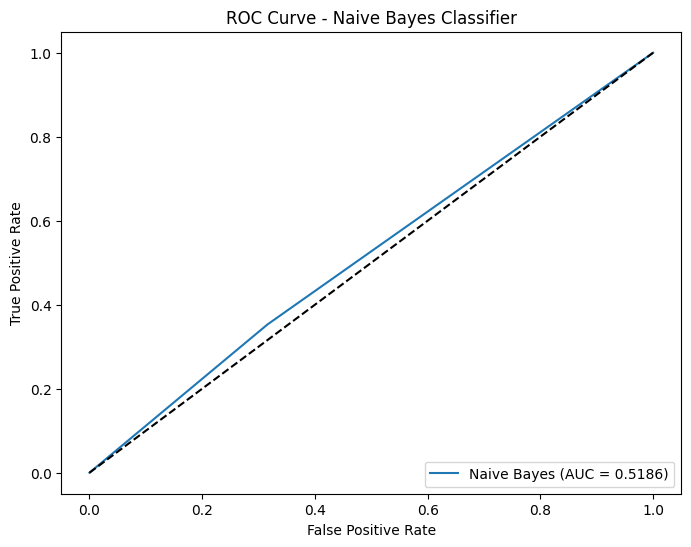

In [16]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_group, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

## 2e

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features and labels for Group prediction
y_group = df['Group']  # Group labels: Healthy vs Rheumatoid Arthritis
label_encoder_group = LabelEncoder()
y_group_encoded = label_encoder_group.fit_transform(y_group)  # Encode group labels

X = df.drop(columns=['refinebio_accession_code', 'Group'])  # Drop irrelevant columns

# Split data for Group prediction
X_train, X_test, y_train, y_test = train_test_split(
    X, y_group_encoded, test_size=0.3, random_state=56, stratify=y_group_encoded
)

# Train and evaluate Naive Bayes model for group classification
nb_group = GaussianNB()
nb_group.fit(X_train, y_train)

# Predict on test set for group classification
y_pred = nb_group.predict(X_test)

# Evaluation
print("\nAssignment 4 Results: Accuracy (Group prediction):", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Assignment 4 Results: Accuracy (Group prediction): 0.5277777777777778
Confusion Matrix:
 [[13  6]
 [11  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.68      0.60        19
           1       0.50      0.35      0.41        17

    accuracy                           0.53        36
   macro avg       0.52      0.52      0.51        36
weighted avg       0.52      0.53      0.51        36



## 3

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Separate features and labels for Group prediction
y_group = df['Group']
label_encoder_group = LabelEncoder()
y_group_encoded = label_encoder_group.fit_transform(y_group)

# Define gene counts to iterate over
gene_counts = [10, 100, 1000, 10000]
auc_scores = {}

for count in gene_counts:
    # Select top 'count' most variable genes
    top_genes = df.drop(columns=['refinebio_accession_code', 'Group']).var().nlargest(count).index
    X_subset = df[top_genes]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y_group_encoded, test_size=0.3, random_state=56, stratify=y_group_encoded
    )
    
    # Initialize and train Naive Bayes classifier
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_proba = nb.predict_proba(X_test)[:, 1]
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores[count] = auc
    print(f"AUC with top {count} genes: {auc:.4f}")

AUC with top 10 genes: 0.4675
AUC with top 100 genes: 0.4149
AUC with top 1000 genes: 0.5418
AUC with top 10000 genes: 0.6115


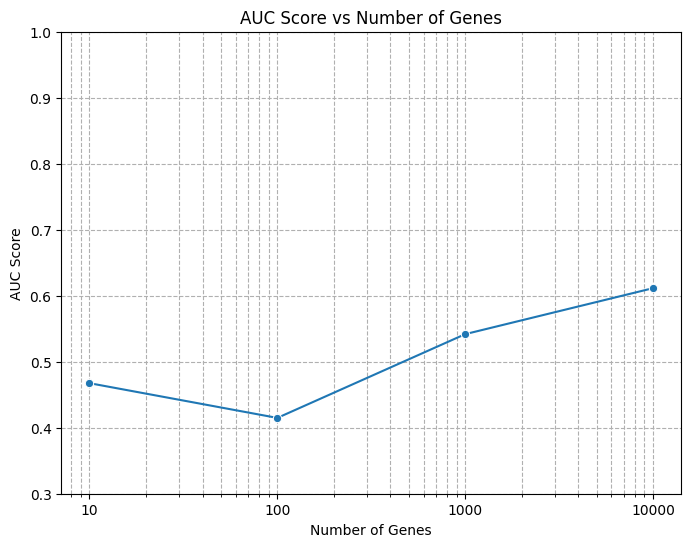

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting AUC vs Number of Genes with log-scaled x-axis
plt.figure(figsize=(8, 6))
sns.lineplot(x=list(auc_scores.keys()), y=list(auc_scores.values()), marker='o')
plt.xscale('log')
plt.xlabel('Number of Genes')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Genes')
plt.xticks(gene_counts, gene_counts)
plt.ylim(0.3, 1.0)
plt.grid(True, which="both", ls="--")
plt.show()

## Heatmap

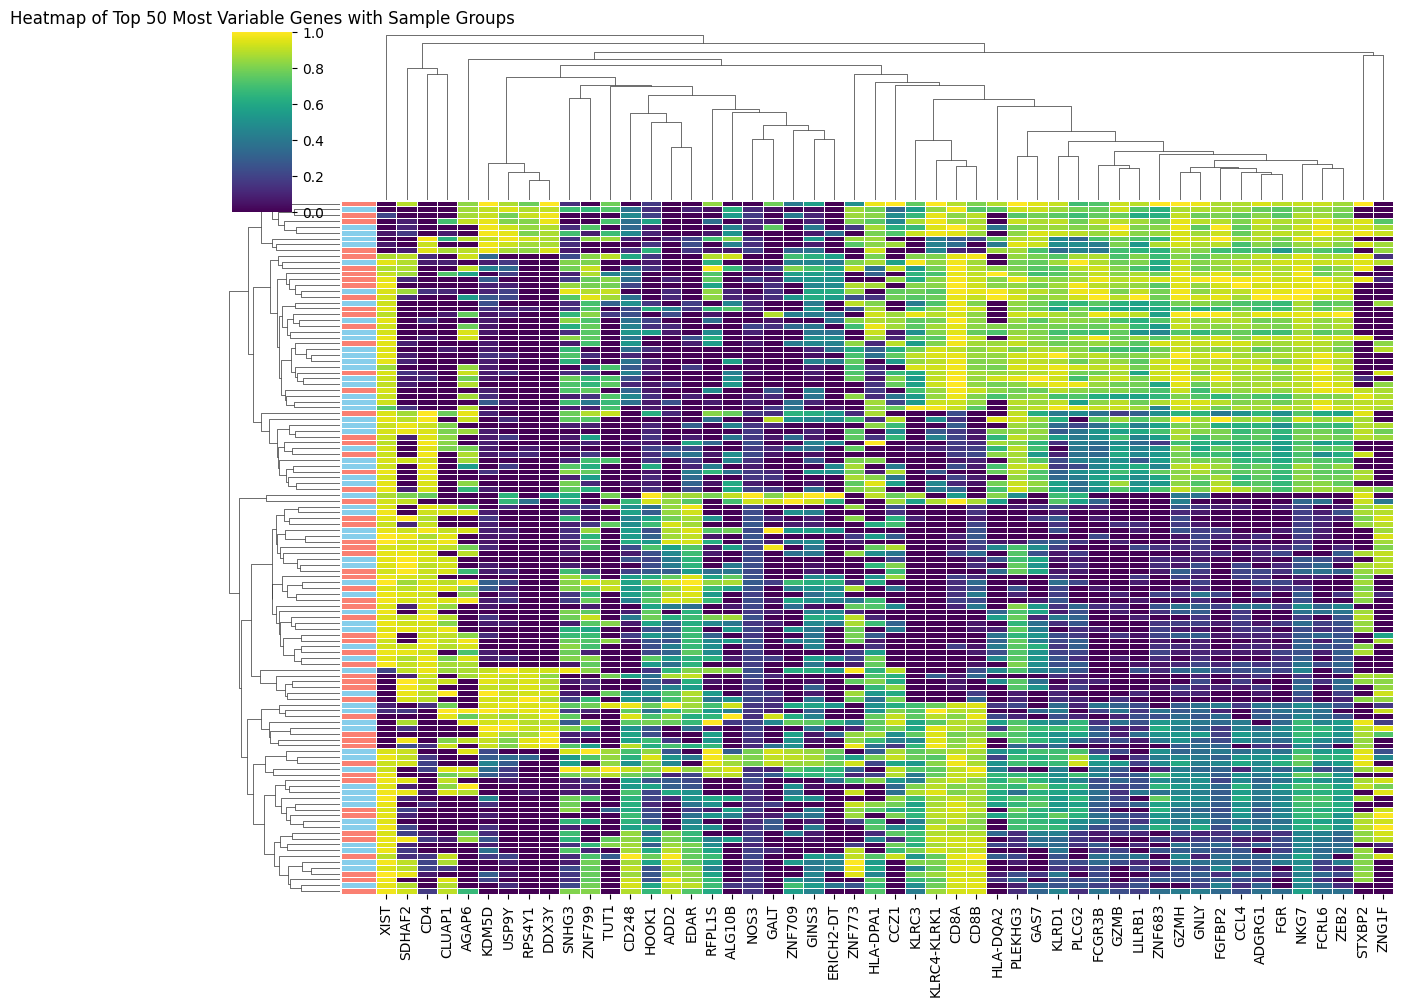

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 50 genes for visualization
top_50_genes = df.drop(columns=['refinebio_accession_code', 'Group']).var().nlargest(50).index
X_top50 = df[top_50_genes]

# Create a dataframe for the heatmap
heatmap_df = X_top50.copy()
heatmap_df['Group'] = y_group_encoded

# Set the sample group as a separate annotation
group_colors = ['skyblue' if label == 0 else 'salmon' for label in heatmap_df['Group']]
heatmap_df = heatmap_df.drop(columns=['Group'])

# Plot heatmap with dendrograms
sns.clustermap(
    heatmap_df,
    cmap='viridis',
    figsize=(12, 10),
    col_cluster=True,
    row_cluster=True,
    standard_scale=1,
    yticklabels=False,
    linewidths=.5,
    cbar_pos=(0.02, 0.8, 0.05, 0.18),
    dendrogram_ratio=(.1, .2),
    colors_ratio=(.03, .03),
    row_colors=group_colors
)

plt.title('Heatmap of Top 50 Most Variable Genes with Sample Groups')
plt.show()